In [ ]:
!pip install overpy
!pip install osmnx
#!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for overpy: filename=overpy-0.6-py3-none-any.whl size=14092 sha256=6e199323ba06e2117236d27f86106afeac2aafb98e595c0d974dac4ccfaf96e9
  Stored in directory: /root/.cache/pip/wheels/6f/05/ef/529f51b5983091d5b53077e4f2f81d052a939573c5dd07acfc
Successfully built overpy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 3.7 MB/s eta 0:00:00


In [ ]:
import overpy
import geopandas as gpd
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import osmnx as ox
import pandas as pd
from shapely.geometry import Point, Polygon
import shapely
import geocoder
#import streamlit as st
import re

In [ ]:
crs_applied = 'epsg:4326'
city = 'Budapest'

x_mess = 'Kérlek add meg a szélességi koordinátákat!\n'
y_mess = 'Kérlek add meg a hosszúsági koordinátákat!\n'

In [ ]:
# generate city polygons
def generate_city_level_polygons(city):

    city_pol = ox.geocoder.geocode_to_gdf(city)[['geometry']]

    city_pol['city_name'] = city
    city_pol=city_pol[['city_name','geometry']]

    city_pol = city_pol.to_crs(crs_applied)
    city_pol.plot(color = 'grey')

    return city_pol

In [ ]:
def get_coordinates(poimess):

  poipattern = re.compile(r"^[0-9]+(\.[0-9]+)?$")

  while True:
    poin = input(poimess)

    if re.match(poipattern, poin):
        break
    else:
        print('Kérlek tizedes pontossággal add meg a koordinátát, a tizedesvessző helyett pedig használj pontot.')

  poival = float(poin)

  return poival

In [ ]:
def get_postcode_zone(crs_applied, y_coor, x_coor):

  point_gdf = gpd.GeoDataFrame(index=[0], crs=crs_applied, geometry=[Point([y_coor, x_coor])])

  identified_area = postal_codes[postal_codes.contains(point_gdf.at[0, 'geometry'])]

  if len(identified_area) == 0:
    print('A kiválasztott pont valószínűleg nem tartozik egyik budapesti irányítószám-körzethez sem.')
  else:
    print('A kiválasztott pont irányítószám-körzete a következő: ' + identified_area.iloc[0]['name'])

    axes = postal_codes.plot(facecolor = 'grey')
    identified_area.plot(ax=axes, facecolor = 'red')

    point_gdf.plot(
      ax = axes,
      color = 'gold',
      markersize = 5
    )

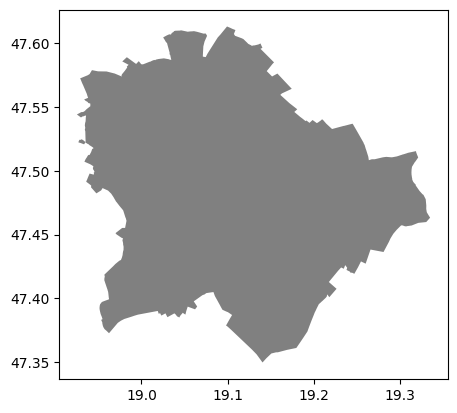

In [ ]:
city_level_polygon = generate_city_level_polygons(city)

In [ ]:
postal_codes = ox.features.features_from_polygon(city_level_polygon.iloc[0]['geometry'], tags={'boundary':'postal_code'}).to_crs(crs_applied)
postal_codes = postal_codes[postal_codes['postal_code'].str[0] == '1']

<ipython-input-8-8462588ca6b3>:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  postal_codes = ox.geometries.geometries_from_polygon(city_level_polygon.iloc[0]['geometry'], tags={'boundary':'postal_code'}).to_crs(crs_applied)


In [ ]:
#postal_codes.plot(figsize=(10,10), color = 'grey')

In [ ]:
#47.423603412789674, 19.079957984484686 for testing

x_coor = get_coordinates(x_mess)
y_coor = get_coordinates(y_mess)

Kérlek add meg a szélességi koordinátákat!
47.4
Kérlek add meg a hosszúsági koordinátákat!
19.02


A kiválasztott pont irányítószám-körzete a következő: 1223 Budapest XXII. kerület


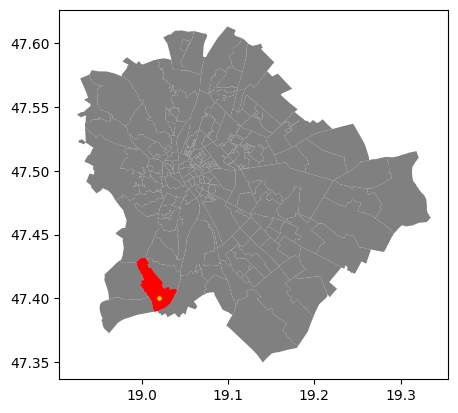

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
get_postcode_zone(crs_applied, y_coor, x_coor)